Bag of words: a model is used in NLP for classification where the frequency  of each word is used as a feature for training a classifier.<br>
<br>Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is called Naïve because it assumes that the (occurrence) of a certain feature is independent of the occurrence of other features.<br>
<br>So because it is important to check occurrence of features we use bag of words model for extracting occurence of words

In [1]:
#import libraries for eda, cleaning and model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from collections import defaultdict
import nltk
from nltk.corpus import wordnet as wn
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation

[nltk_data] Downloading package wordnet to C:\Users\BARAN
[nltk_data]     JOON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\BARAN
[nltk_data]     JOON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BARAN
[nltk_data]     JOON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First, let's read in the data.

In [159]:
reviews = pd.read_csv('Assignment text mining - data clothing reviews.csv')
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [160]:
reviews['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

continue with dresses

In [161]:
df = reviews.loc[reviews['Class Name'] == 'Dresses']
df['Class Name'].value_counts()

Dresses    6319
Name: Class Name, dtype: int64

In [162]:
df=df.dropna()
df['Class Name'].value_counts()

Dresses    5371
Name: Class Name, dtype: int64

In [163]:
df=df[['Review Text','Rating']]
df=df.rename(columns={"Review Text": "text", "Rating": "rating", "Recommended IND": "index"})
df.head(10)

,text,rating
2,I had such high hopes for this dress and reall...,3
5,"I love tracy reese dresses, but this one is no...",2
8,I love this dress. i usually get an xs but it ...,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5
10,Dress runs small esp where the zipper area run...,3
12,More and more i find myself reliant on the rev...,5
14,This is a nice choice for holiday gatherings. ...,3
19,I love the look and feel of this tulle dress. ...,5
21,"I'm upset because for the price of the dress, ...",4
22,"First of all, this is not pullover styling. th...",2


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

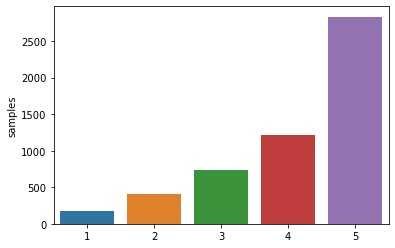

In [164]:
x=df['rating'].value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

convert ratings to positive(>3) and negative(<4)

In [165]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df['rating'])

df.loc[df.rating >=4 , "rating"] = "positive"
df.loc[df.rating != "positive", "rating"] = "negative"

df.head(10)

,text,rating
2,I had such high hopes for this dress and reall...,negative
5,"I love tracy reese dresses, but this one is no...",negative
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
10,Dress runs small esp where the zipper area run...,negative
12,More and more i find myself reliant on the rev...,positive
14,This is a nice choice for holiday gatherings. ...,negative
19,I love the look and feel of this tulle dress. ...,positive
21,"I'm upset because for the price of the dress, ...",positive
22,"First of all, this is not pullover styling. th...",negative


Cleaning the dataset

In [166]:
df.iloc[0]['text']

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [167]:
df['text']=df['text'].str.lower()
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,text,rating
2,high hopes dress really wanted work me. initia...,negative
5,"love tracy reese dresses, one petite. 5 feet t...",negative
8,love dress. usually get xs runs little snug bu...,positive
9,"i'm 5""5' 125 lbs. ordered petite make sure len...",positive
10,dress runs small esp zipper area runs. ordered...,negative


In [168]:
def remove_special_characters(text):
    pattern=r'[^a-zA-Z\s]'
    text=re.sub(pattern,'',text)
    return text
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

df['text'] = df['text'].apply(remove_special_characters)
df['text'] = df['text'].apply(strip_punctuation)

In [169]:
df.head(10)

,text,rating
2,high hopes dress really wanted work me initial...,negative
5,love tracy reese dresses one petite feet tall...,negative
8,love dress usually get xs runs little snug bus...,positive
9,im lbs ordered petite make sure length long ...,positive
10,dress runs small esp zipper area runs ordered ...,negative
12,find reliant reviews written savvy shoppers pa...,positive
14,nice choice holiday gatherings like length gra...,negative
19,love look feel tulle dress looking something d...,positive
21,im upset price dress thought embroidered no pr...,positive
22,first all pullover styling side zipper purchas...,negative



To read the text and use it for our analysis, we need an object from sklearn called a CountVectorizer. Essentially, what it does is create a dictionary from a series of text. It lowercases the text and tokenizes it by using whitespace and interpunction as separations between words. I use a list of frequent English words ('stop words') that will not be counted: they are not informative enough.

We will need to convert the text to Unicode, which is a standard text format. We do so by using .values.astype('U').

In [170]:
from sklearn.feature_extraction.text import CountVectorizer #The CountVectorizer object

text = df['text'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect = vect.fit(text) #We fit the model with the words from the review text
feature_names = vect.get_feature_names() #Get the words from the vocabulary
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 8732 words in the vocabulary. A selection: ['badly', 'badso', 'baffled', 'bag', 'baggage', 'baggier', 'bagginess', 'bagging', 'baggish', 'baggy', 'baggybig', 'baglike', 'bags', 'bahamas', 'bailey', 'baily', 'bainbridge', 'balance', 'balanced', 'balances']



Now that we have the dictionary, we can count the occurences of each word for each review. This way, we can create a document-feature matrix, with documents (reviews) in the rows, and features (words) in the columns.

In [171]:
docu_feat = vect.transform(text) # make a matrix

In [172]:
print(docu_feat[0:500,0:500])

  (1, 210)	1
  (1, 466)	1
  (4, 341)	1
  (8, 466)	1
  (9, 475)	1
  (10, 313)	1
  (11, 253)	1
  (12, 173)	1
  (13, 211)	1
  (14, 93)	1
  (14, 108)	1
  (20, 341)	1
  (20, 377)	1
  (22, 363)	1
  (24, 88)	1
  (24, 180)	1
  (25, 450)	1
  (25, 466)	1
  (26, 208)	1
  (26, 253)	1
  (27, 79)	1
  (27, 271)	1
  (27, 307)	1
  (27, 369)	1
  (30, 17)	1
  :	:
  (471, 373)	1
  (472, 360)	1
  (474, 83)	1
  (475, 148)	2
  (476, 17)	1
  (477, 27)	1
  (479, 51)	1
  (481, 371)	1
  (486, 375)	1
  (486, 485)	1
  (487, 226)	1
  (487, 475)	1
  (488, 456)	1
  (488, 469)	1
  (489, 45)	1
  (492, 47)	1
  (493, 173)	1
  (493, 310)	1
  (494, 180)	1
  (497, 133)	1
  (498, 17)	1
  (498, 226)	1
  (499, 144)	1
  (499, 327)	1
  (499, 360)	1



Now, we will use the Naïve Bayes classifier from sklearn.

In [173]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() #create the model
X = docu_feat #the document-feature matrix is the X matrix
y = df['rating'] #creating the y vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data and store it

nb = nb.fit(X_train, y_train) #fit the model X=features, y=character

#Evaluate the model
y_test_p = nb.predict(X_test)
nb.score(X_test, y_test)

0.8486352357320099

The accuracy is 84.8%,

In [174]:
y_test_p

array(['positive', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

Let's create a confusion matrix

In [175]:
nb.classes_

array(['negative', 'positive'], dtype='<U8')

In [176]:
cm = confusion_matrix(y_test, y_test_p)
cm = pd.DataFrame(cm, index=['negative', 'positive'], columns=['negative pred', 'positive pred'])
cm

,negative pred,positive pred
negative,225,181
positive,63,1143


In [177]:
df['rating_pred'] = pd.Series(y_test_p)
df.head(10)

,text,rating,rating_pred
2,high hopes dress really wanted work me initial...,negative,positive
5,love tracy reese dresses one petite feet tall...,negative,negative
8,love dress usually get xs runs little snug bus...,positive,positive
9,im lbs ordered petite make sure length long ...,positive,positive
10,dress runs small esp zipper area runs ordered ...,negative,negative
12,find reliant reviews written savvy shoppers pa...,positive,positive
14,nice choice holiday gatherings like length gra...,negative,positive
19,love look feel tulle dress looking something d...,positive,positive
21,im upset price dress thought embroidered no pr...,positive,positive
22,first all pullover styling side zipper purchas...,negative,negative


Check out 3 cases where your model is off target.<br>There is much more positive rating in the data set and it affects on the prediction. so if we just predict one of the labels positive or negative, we could increase the accouracy.<br> also in bag of words some words occure more in positive ratings but rating is negative and viceversa. 

In [184]:
df_off=df.query('rating != rating_pred')
df_off.head()

,text,rating,rating_pred
2,high hopes dress really wanted work me initial...,negative,positive
14,nice choice holiday gatherings like length gra...,negative,positive
23,cute little dress fits tts little high waisted...,negative,positive
69,really wanted work alas strange fit me straps ...,negative,positive
87,debated n think looks loose model tighten it l...,positive,negative


In [182]:
df['rating'].value_counts()

positive    4045
negative    1326
Name: rating, dtype: int64